In [1]:
"""
This file contains code that will kick off training and testing processes
"""
import os
import json
from experiments.UNetExperiment import UNetExperiment
from data_prep.HippocampusDatasetLoader import LoadHippocampusData
import pandas as pd
from itertools import chain
import numpy as np

In [ ]:

class Config:
    """
    Holds configuration parameters
    """
    def __init__(self):
        self.name = "Basic_unet"
        self.root_dir = r"/media/ahmed000/Personal/Learning/DeepLearning/projects/AI_for_HC_ND/Third_course/final_project/section1/out/TrainingSet"
        self.n_epochs = 10
        self.learning_rate = 0.0002
        self.batch_size = 8
        self.patch_size = 64
        self.test_results_dir = "/media/ahmed000/Personal/Learning/DeepLearning/projects/AI_for_HC_ND/Third_course/final_project/section2/out"

if __name__ == "__main__":
    # Get configuration
    #del data

    # TASK: Fill in parameters of the Config class and specify directory where the data is stored and 
    # directory where results will go
    c = Config()

    # Load data
    print("Loading data...")
    # TASK: LoadHippocampusData is not complete. Go to the implementation and complete it. 
    data = LoadHippocampusData(c.root_dir, y_shape = c.patch_size, z_shape = c.patch_size)
    # Create test-train-val split
    # In a real world scenario you would probably do multiple splits for 
    # multi-fold training to improve your model quality

    keys =[x for x in range(len(data))] #range(len(data))

    # Here, random permutation of keys array would be useful in case if we do something like 
    # a k-fold training and combining the results. 
    split = dict()
    # and testing respectively.    # TASK: create three keys in the dictionary: "train", "val" and "test". In each key, store
    # the array with indices of training volumes to be used for train
    #print("dataset length",len(data))
    tr_end=int(0.6*len(data))
    val_end=int(0.8*len(data))
    train_keys=keys[:tr_end]
    val_keys=keys[tr_end:val_end]
    test_keys=keys[val_end:]
    print(len(train_keys),len(val_keys),len(test_keys))
    split["train"],split["val"],split["test"]=np.split(keys,[tr_end,val_end])
    # Set up and run experiment
#     print("validation len",len(split["val"]))
#     print("test le",len(split["test"]))
    # TASK: Class UNetExperiment has missing pieces. Go to the file and fill them in
    exp = UNetExperiment(c, split, data)

    # You could free up memory by deleting the dataset
    # as it has been copied into loaders
    # run training
    exp.run()

    # prep and run testing
    # TASK: Test method is not complete. Go to the method and complete it
    results_json = exp.run_test()
    results_json["config"] = vars(c)
    with open(os.path.join(exp.out_dir, "results.json"), 'w') as out_file:
        json.dump(results_json, out_file, indent=2, separators=(',', ': '))



In [6]:
### Seperate interface PArt to avoid retraining the model if interface was hanged

In [4]:
%%time
%matplotlib inline

import matplotlib.cm

import matplotlib.pyplot as plt
import numpy as np
from medpy.io import load
from inference.UNetInferenceAgent import UNetInferenceAgent
from utils.volume_stats import Dice3d,Jaccard3d
import torch
path="/media/ahmed000/Personal/Learning/DeepLearning/projects/AI_for_HC_ND/Third_course/final_project/section1/out/TrainingSet"
data = LoadHippocampusData(path, y_shape = 64, z_shape = 64)
images_t=data[230:]# r"/media/ahmed000/Personal/Learning/DeepLearning/projects/AI_for_HC_ND/Third_course/final_project/section1/out/TrainingSet/images/hippocampus_001.nii.gz"

out_dict = {}
out_dict["volume_stats"] = []
dc_list = []

jc_list = []
inference_agent = UNetInferenceAgent("/media/ahmed000/Personal/Learning/DeepLearning/projects/AI_for_HC_ND/Third_course/final_project/section2/out/2020-05-30_1018_Basic_unet/model.pth")
with torch.no_grad():
    for i, x in enumerate(images_t):
        pred_label = inference_agent.single_volume_inference(x["image"])
        dc = Dice3d(pred_label, x["seg"])
        jc = Jaccard3d(pred_label, x["seg"])
        dc_list.append(dc)
        jc_list.append(jc)
        out_dict["volume_stats"].append({
            "filename": x['filename'],
            "dice": dc,
            "jaccard": jc
            })
        print(f"{x['filename']} Dice {dc:.4f}. {100*(i+1)/len(images_t):.2f}% complete")
out_dict["overall"] = {
    "mean_dice": np.mean(dc_list),
    "mean_jaccard": np.mean(jc_list)}

print("\nTesting complete.")
out_dir= "/media/ahmed000/Personal/Learning/DeepLearning/projects/AI_for_HC_ND/Third_course/final_project/section2/out"
with open(os.path.join(out_dir, "results.json"), 'w') as out_file:
    json.dump(out_dict, out_file, indent=2, separators=(',', ': '))



Processed 260 files, total 9198 slices
torch.Size([32, 1, 64, 64])
hippocampus_216.nii.gz Dice 0.8943. 3.33% complete
torch.Size([38, 1, 64, 64])
hippocampus_217.nii.gz Dice 0.8366. 6.67% complete
torch.Size([37, 1, 64, 64])
hippocampus_219.nii.gz Dice 0.8829. 10.00% complete
torch.Size([39, 1, 64, 64])
hippocampus_220.nii.gz Dice 0.8932. 13.33% complete
torch.Size([32, 1, 64, 64])
hippocampus_221.nii.gz Dice 0.7579. 16.67% complete
torch.Size([34, 1, 64, 64])
hippocampus_222.nii.gz Dice 0.8126. 20.00% complete
torch.Size([35, 1, 64, 64])
hippocampus_223.nii.gz Dice 0.8727. 23.33% complete
torch.Size([37, 1, 64, 64])
hippocampus_224.nii.gz Dice 0.8659. 26.67% complete
torch.Size([33, 1, 64, 64])
hippocampus_225.nii.gz Dice 0.8530. 30.00% complete
torch.Size([32, 1, 64, 64])
hippocampus_226.nii.gz Dice 0.8359. 33.33% complete
torch.Size([36, 1, 64, 64])
hippocampus_227.nii.gz Dice 0.8954. 36.67% complete
torch.Size([37, 1, 64, 64])
hippocampus_228.nii.gz Dice 0.8321. 40.00% complete
tor

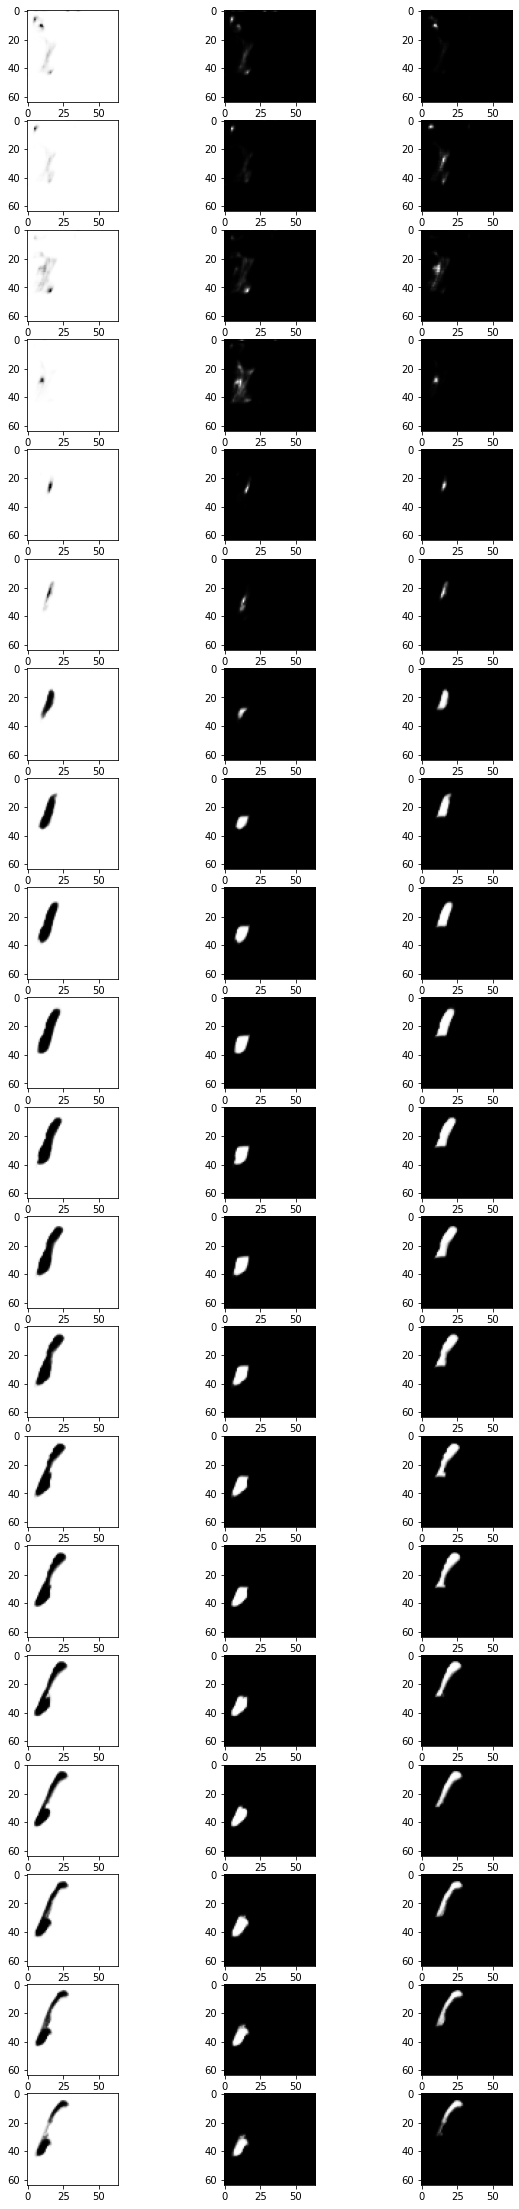

In [5]:
%matplotlib inline

figure,axes=plt.subplots(20,3,figsize=(10,40))
axes=axes.flatten()
for ind in range(20):
    axes[ind*3].imshow(pred_label[ind,0,:,:],cmap='gray')
    axes[ind*3+1].imshow(pred_label[ind,1,:,:],cmap='gray')
    axes[ind*3+2].imshow(pred_label[ind,2,:,:],cmap='gray')